# Nose_shoulder(SA)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model ,models, layers, optimizers, utils
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf           
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

In [2]:
tf.__version__

'2.9.0'

In [3]:
#GPU 용량 할당시키기 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2 GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]) # limit in megabytes
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
sheet = pd.read_csv(r'AII_normal_patime2.csv', index_col = 0)
sheet = sheet.dropna()
# sheet

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [5]:
angle = "nose_shoulder_angle"

In [6]:
number = sheet[["num", angle]]
number

,num,nose_shoulder_angle
2,1,4.170437
3,1,1.166955
4,1,3.343215
6,1,4.951739
7,1,10.802215
...,...,...
14983,30,19.482691
14984,30,23.133894
14985,30,26.189058
14986,30,29.274163


In [7]:
num = number["num"]
num = np.array(num)
num = list(dict.fromkeys(num))

In [8]:
# num

# Train

In [9]:
# epochs = 100
# batch = 32
# lr = 0.0001

In [10]:
# lstm_ae = models.Sequential()
# # Encoder
# lstm_ae.add(layers.LSTM(32, activation='relu', input_shape=(1000, 1), return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=False))
# lstm_ae.add(layers.RepeatVector(1))

# # Decoder
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=True))
# lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))

# lstm_ae.summary()

In [11]:
# for i in num:
#     number_num = number[number["num"]== i].dropna()
#     number_num = number_num[[angle]]
#     number_num = scaler.fit_transform(number_num)
#     number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
#     lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))
#     history = lstm_ae.fit(number_num, number_num, epochs=epochs, batch_size=batch)
    
#     plt.plot(history.history['loss'], label='train loss')
#     plt.legend()
#     plt.xlabel('Epoch'); plt.ylabel('loss')
#     plt.show()

# Pridict

In [12]:
lstm_ae = models.load_model("lstm_ae_nose_shoulder(150_128_32_4_16_0.0001)-19.h5")
lstm_ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 32)          4352      
                                                                 
 dropout (Dropout)           (None, 1000, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVector  (None, 1, 16)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (None, 1, 16)             0         
                                                        

In [13]:
train_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,29,30]

number :  1
10/10 [==============================] - 0s 4ms/step
(303,)


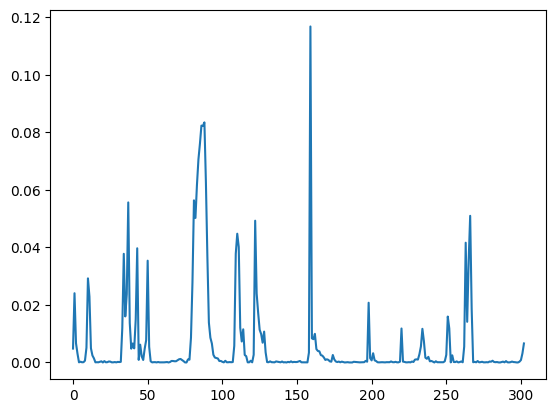

Reconstruction error threshold: 0.11686323972054934
number :  2
16/16 [==============================] - 0s 4ms/step
(504,)


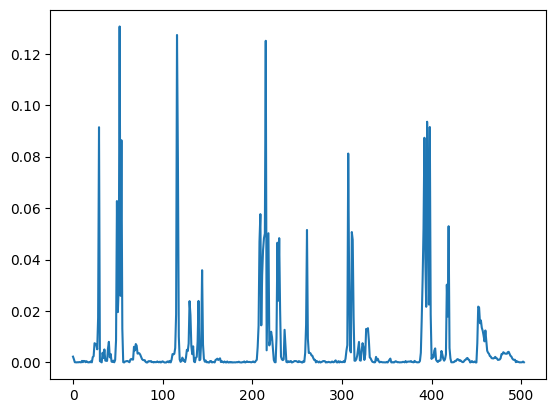

Reconstruction error threshold: 0.13057958166355144
number :  3
17/17 [==============================] - 0s 4ms/step
(535,)


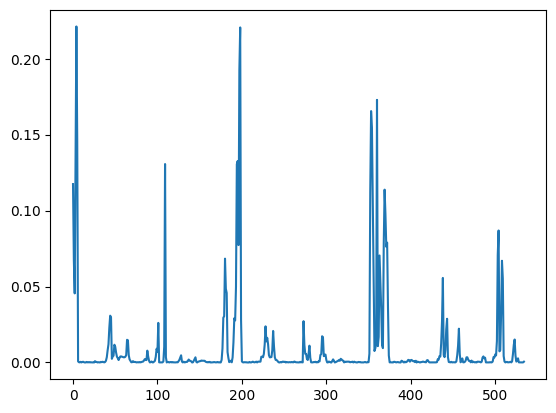

Reconstruction error threshold: 0.2212427259623888
number :  4
23/23 [==============================] - 0s 4ms/step
(717,)


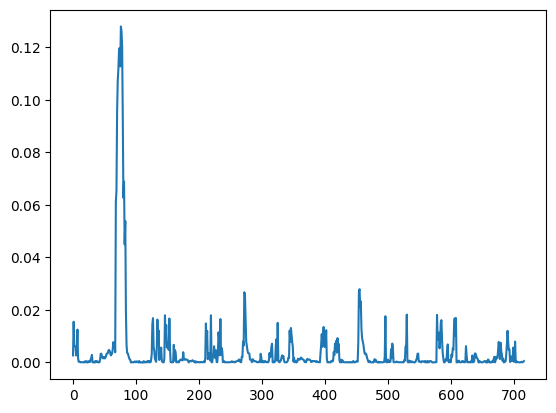

Reconstruction error threshold: 0.12789566711262804
number :  5
24/24 [==============================] - 0s 4ms/step
(741,)


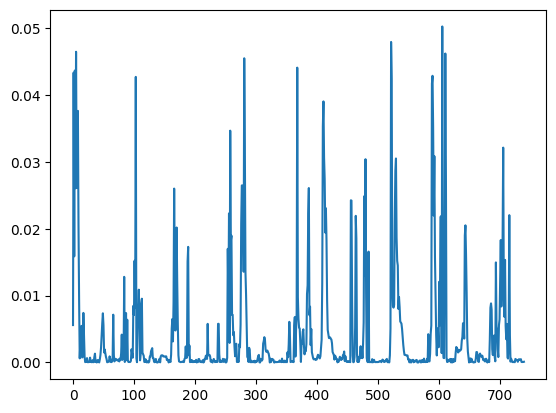

Reconstruction error threshold: 0.05029446410040361
number :  6
27/27 [==============================] - 0s 4ms/step
(853,)


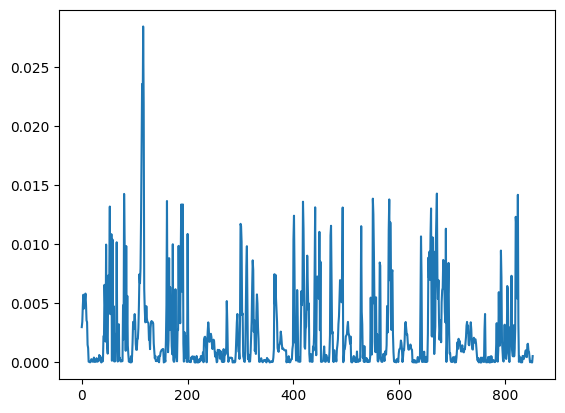

Reconstruction error threshold: 0.028430211645443078
number :  7
27/27 [==============================] - 0s 4ms/step
(845,)


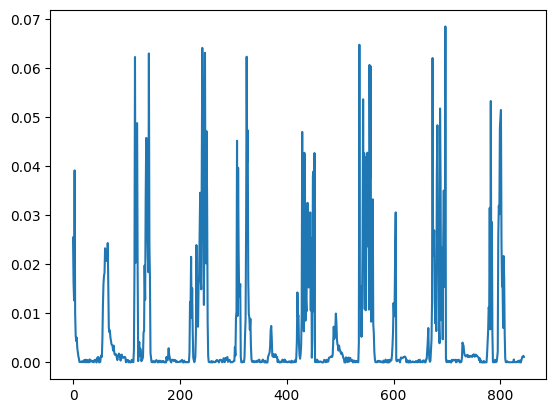

Reconstruction error threshold: 0.06847748426411772
number :  8
25/25 [==============================] - 0s 4ms/step
(773,)


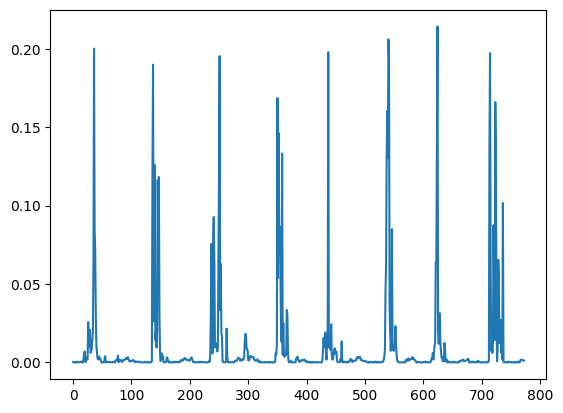

Reconstruction error threshold: 0.2142094736798031
number :  9
21/21 [==============================] - 0s 4ms/step
(655,)


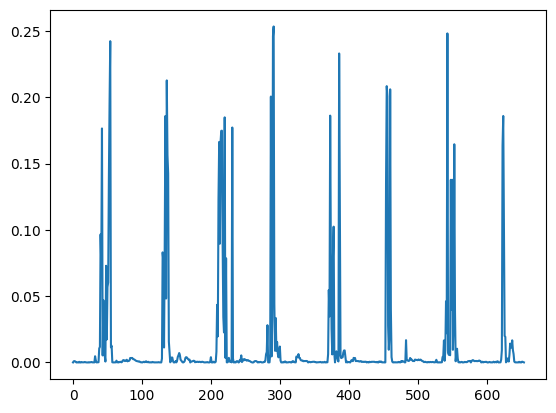

Reconstruction error threshold: 0.25332289069244746
number :  10
18/18 [==============================] - 0s 4ms/step
(557,)


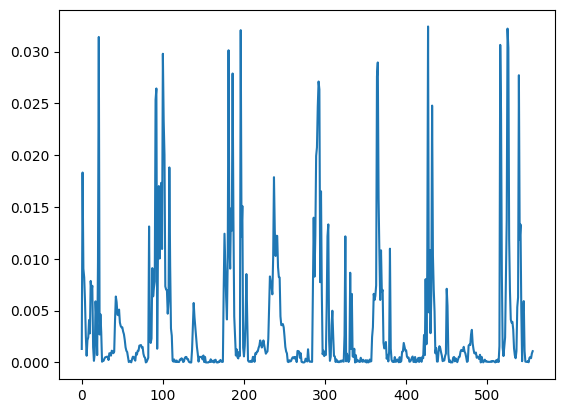

Reconstruction error threshold: 0.03241859896140428
number :  11
25/25 [==============================] - 0s 4ms/step
(777,)


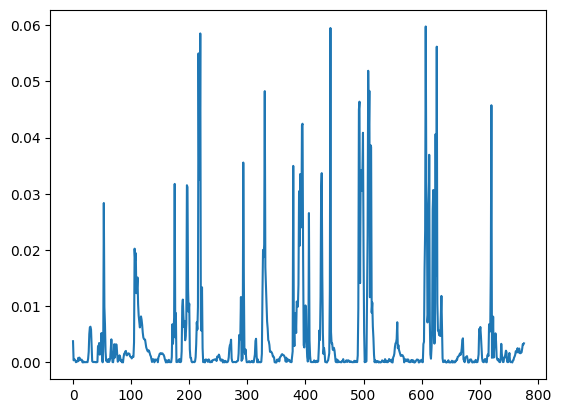

Reconstruction error threshold: 0.05977041896481787
number :  12
24/24 [==============================] - 0s 4ms/step
(757,)


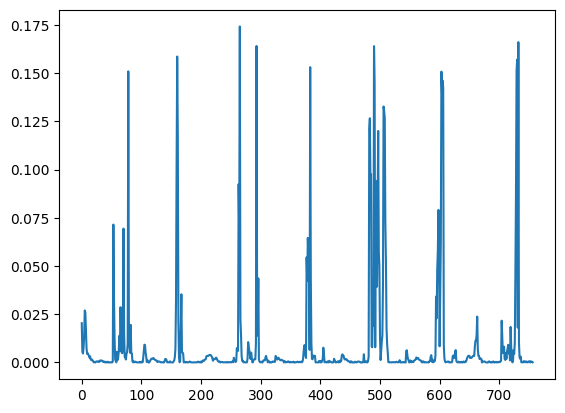

Reconstruction error threshold: 0.17413167531758567
number :  13
19/19 [==============================] - 0s 4ms/step
(578,)


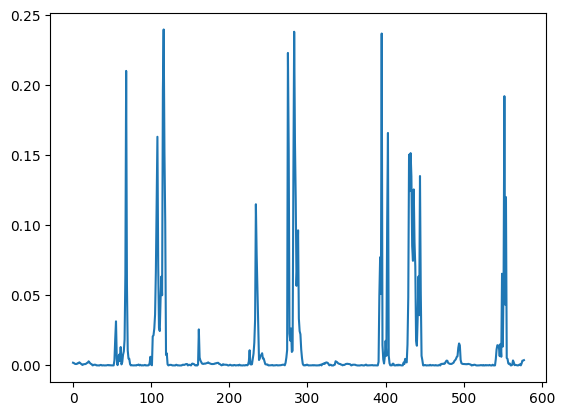

Reconstruction error threshold: 0.2397403857355253
number :  14
9/9 [==============================] - 0s 4ms/step
(280,)


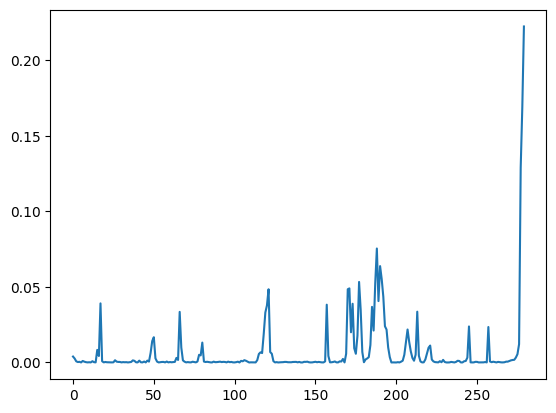

Reconstruction error threshold: 0.2224751772838564
number :  15
15/15 [==============================] - 0s 4ms/step
(463,)


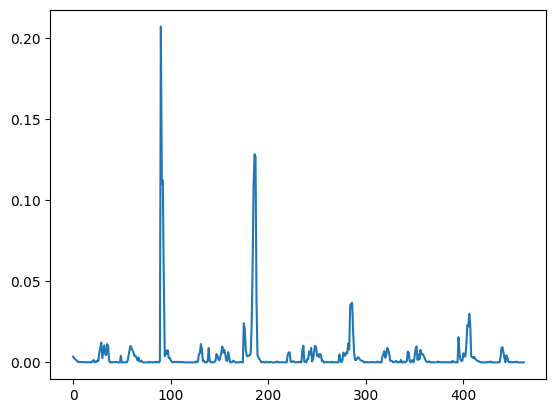

Reconstruction error threshold: 0.20701283729627332
number :  16
11/11 [==============================] - 0s 4ms/step
(327,)


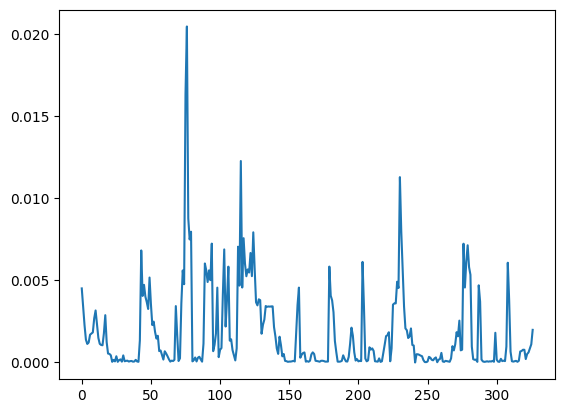

Reconstruction error threshold: 0.020457919548822156
number :  18
20/20 [==============================] - 0s 4ms/step
(623,)


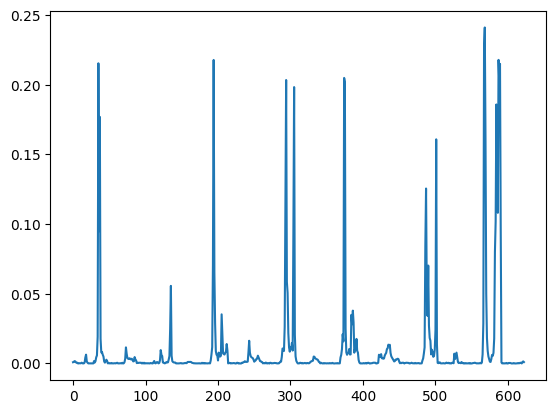

Reconstruction error threshold: 0.24115136915203988
number :  19
14/14 [==============================] - 0s 4ms/step
(441,)


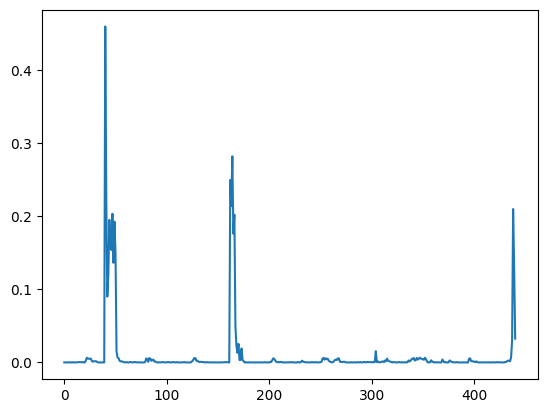

Reconstruction error threshold: 0.46022987042477953
number :  20
18/18 [==============================] - 0s 4ms/step
(567,)


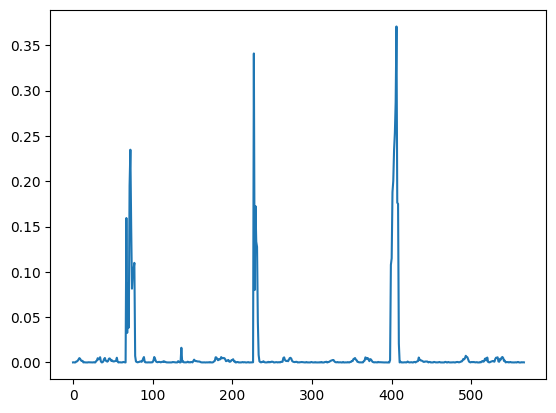

Reconstruction error threshold: 0.37085710818280315
number :  21
18/18 [==============================] - 0s 4ms/step
(553,)


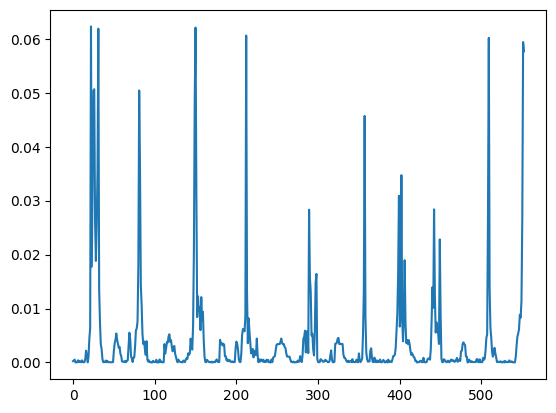

Reconstruction error threshold: 0.06229677795538404
number :  22
7/7 [==============================] - 0s 4ms/step
(207,)


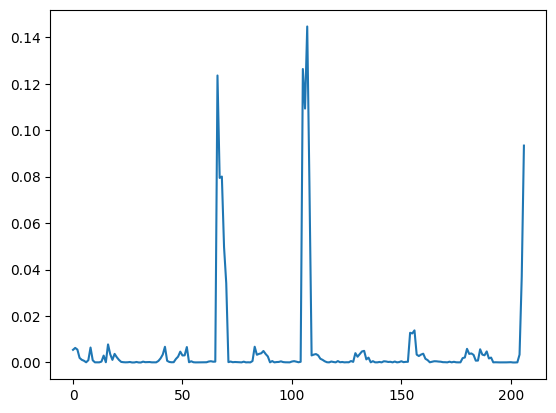

Reconstruction error threshold: 0.1446613667867493
number :  26
15/15 [==============================] - 0s 4ms/step
(457,)


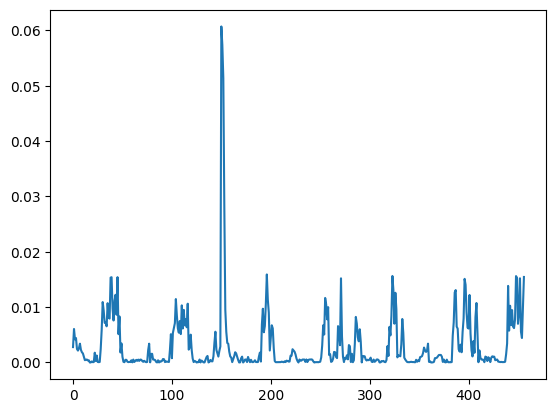

Reconstruction error threshold: 0.06071010963234297
number :  27
8/8 [==============================] - 0s 4ms/step
(240,)


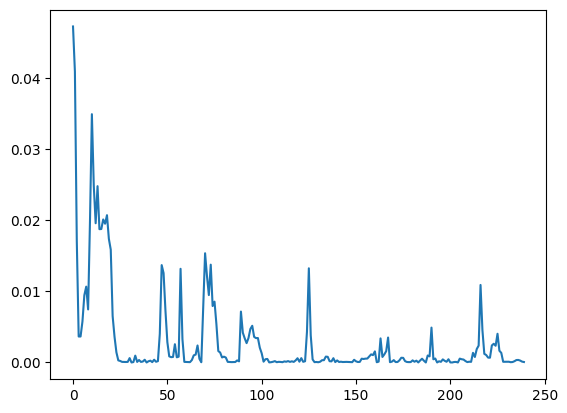

Reconstruction error threshold: 0.04721514472866035
number :  28
7/7 [==============================] - 0s 4ms/step
(199,)


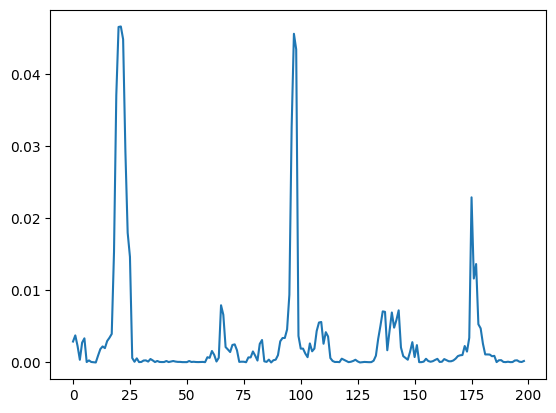

Reconstruction error threshold: 0.04662710444714465
number :  29
7/7 [==============================] - 0s 5ms/step
(197,)


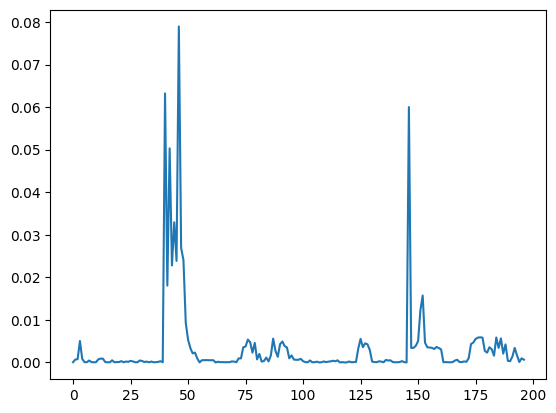

Reconstruction error threshold: 0.0789455047763633
number :  30
3/3 [==============================] - 0s 5ms/step
(70,)


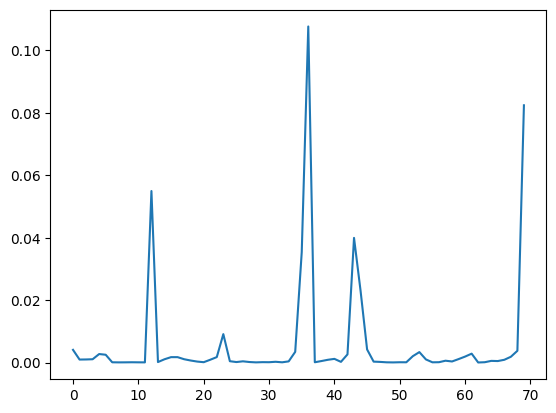

Reconstruction error threshold: 0.10767080795768753


In [16]:
threshold = []
for i in train_num:
    number_num = number[number["num"]== i].dropna()
    print("number : ",i)
    number_num = number_num[[angle]]
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
    train_x_predictions = lstm_ae.predict(number_num)
    train_mae_loss = np.mean(np.power(train_x_predictions - number_num,2), axis=1)
    train_mae_loss = train_mae_loss.flatten()
    
    print(train_mae_loss.shape)
    plt.plot(train_mae_loss)
    plt.show()
    
    train_mae_loss_max = np.max(train_mae_loss)
    threshold.append(train_mae_loss_max )
    
    print(f'Reconstruction error threshold: {train_mae_loss_max }')

In [17]:
threshold_ave = np.mean(threshold)
threshold_ave

0.14568030446129124

In [18]:
# print(epochs,"/" , lr ,"/",  threshold_ave)

=========================================================

# SA TEST

In [19]:
sar_csv = os.listdir("test/sar_long_in/")

-Patient_number :  03.csv
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step
-Data len : 142
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09591868520313815
-Anomaly points: 0


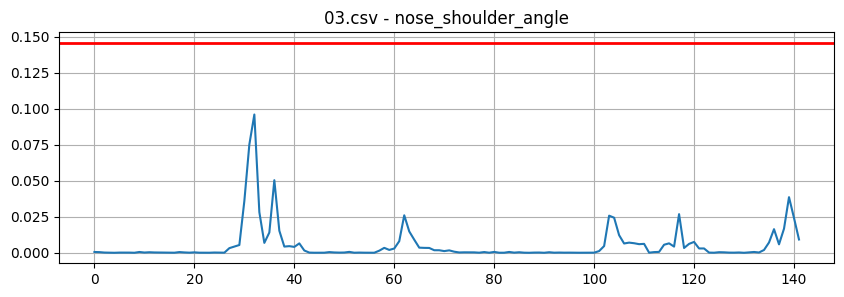

-Patient_number :  07.csv
5/5 [==============================] - 0s 5ms/step
-Data len : 129
-max_anomaly :  0.307316648890529
-min_anomaly :  0.16330471295624294
-Anomaly Area : 0.6810473742311713
-Reconstruction error threshold : 0.307316648890529
-Anomaly points: 4


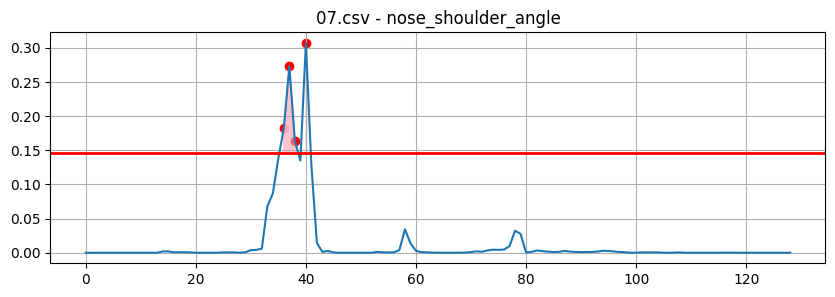

-Patient_number :  115.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 110
-max_anomaly :  0.25566190209553974
-min_anomaly :  0.17422936426230434
-Anomaly Area : 0.4015248024735536
-Reconstruction error threshold : 0.25566190209553974
-Anomaly points: 3


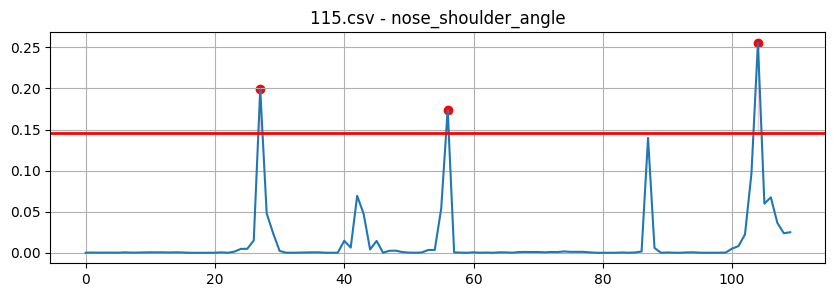

-Patient_number :  120.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 249
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0580729017076167
-Anomaly points: 0


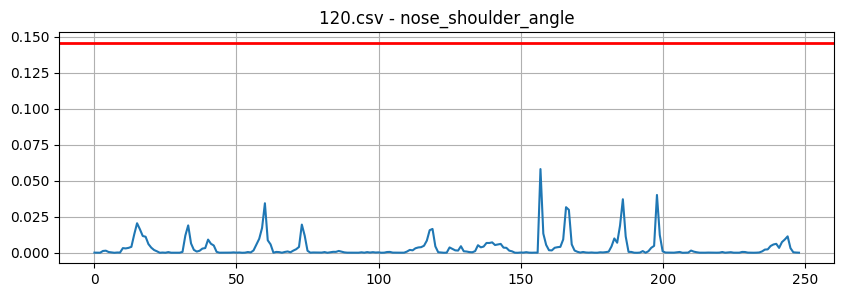

-Patient_number :  123.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 157
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.21416340367303308
-Anomaly points: 1


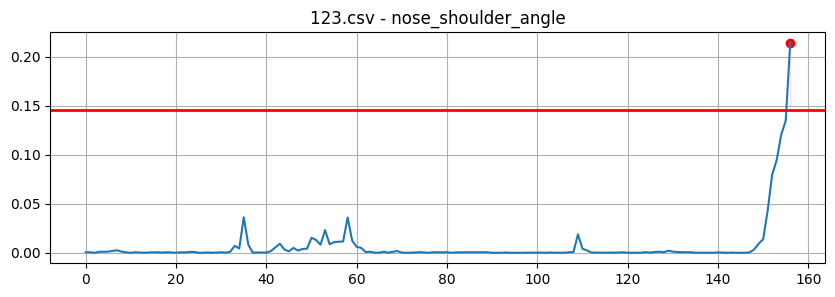

-Patient_number :  141.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 176
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13327963319137556
-Anomaly points: 0


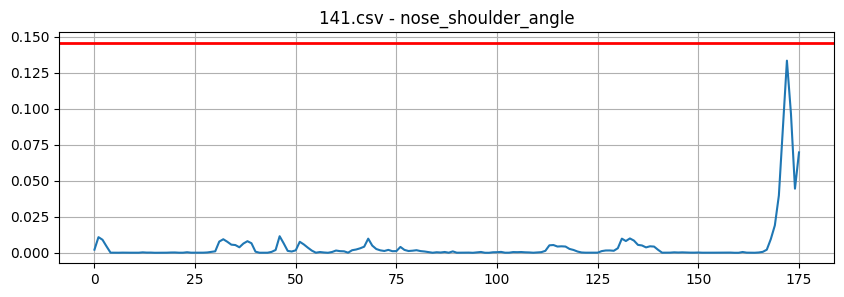

-Patient_number :  143.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 178
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0600206584379413
-Anomaly points: 0


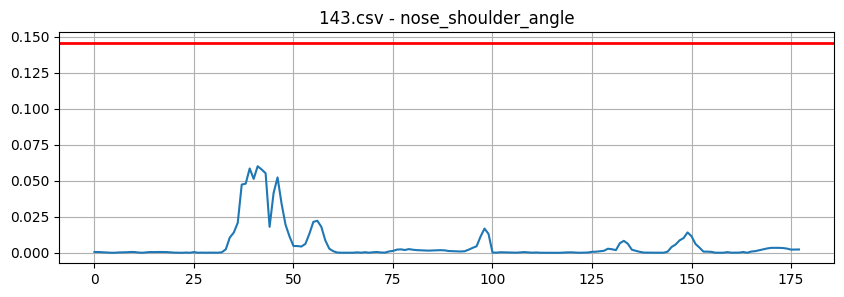

-Patient_number :  151.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 239
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0373980182147887
-Anomaly points: 0


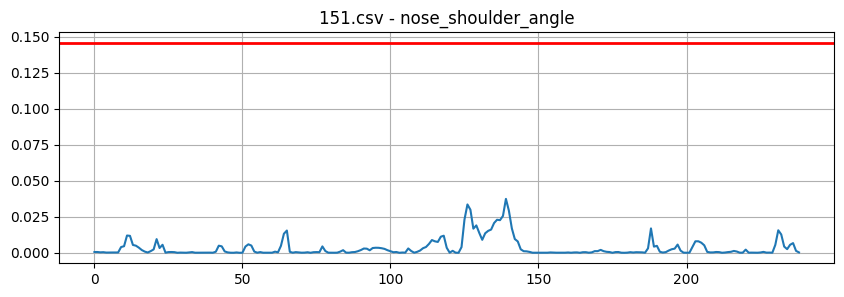

-Patient_number :  154.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 230
-max_anomaly :  0.38404535961962716
-min_anomaly :  0.17440583827143977
-Anomaly Area : 3.4189374910056505
-Reconstruction error threshold : 0.38404535961962716
-Anomaly points: 13


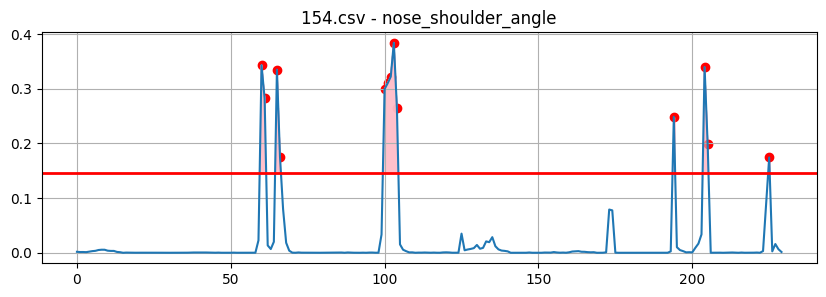

-Patient_number :  166.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 202
-max_anomaly :  0.1511139676137787
-min_anomaly :  0.14841635387531826
-Anomaly Area : 0.1497651607445485
-Reconstruction error threshold : 0.1511139676137787
-Anomaly points: 2


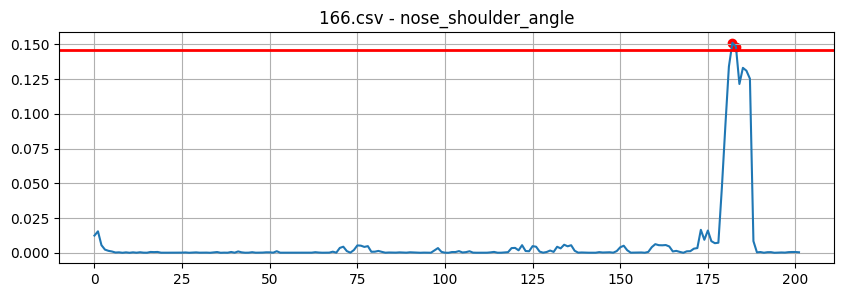

-Patient_number :  178.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 233
-max_anomaly :  0.18599296526222447
-min_anomaly :  0.14998597972393846
-Anomaly Area : 0.3449850896311132
-Reconstruction error threshold : 0.18599296526222447
-Anomaly points: 3


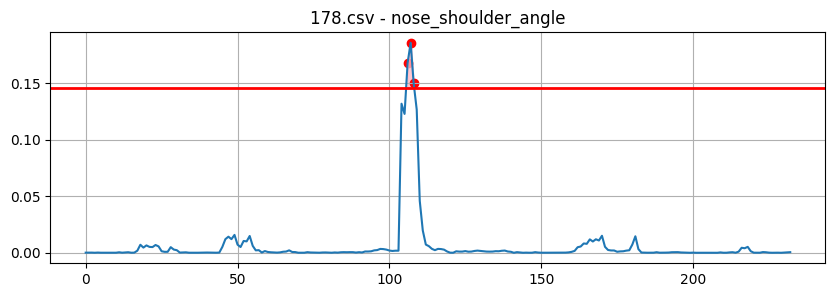

-Patient_number :  189.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12201868748493845
-Anomaly points: 0


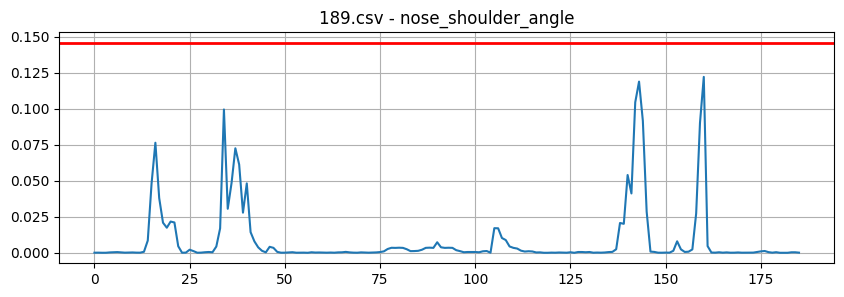

-Patient_number :  195.csv
4/4 [==============================] - 0s 5ms/step
-Data len : 108
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0661080374548421
-Anomaly points: 0


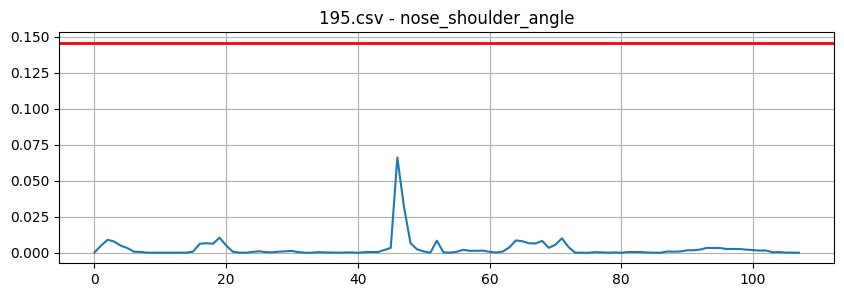

-Patient_number :  198.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 207
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0431274230165961
-Anomaly points: 0


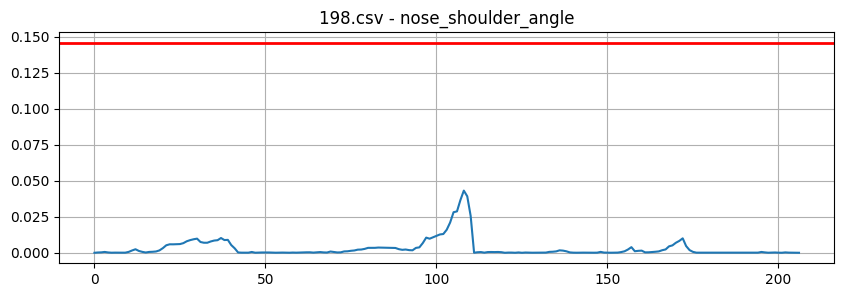

-Patient_number :  199.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 210
-max_anomaly :  0.2641129503640307
-min_anomaly :  0.20850072515281437
-Anomaly Area : 0.23630683775842254
-Reconstruction error threshold : 0.2641129503640307
-Anomaly points: 2


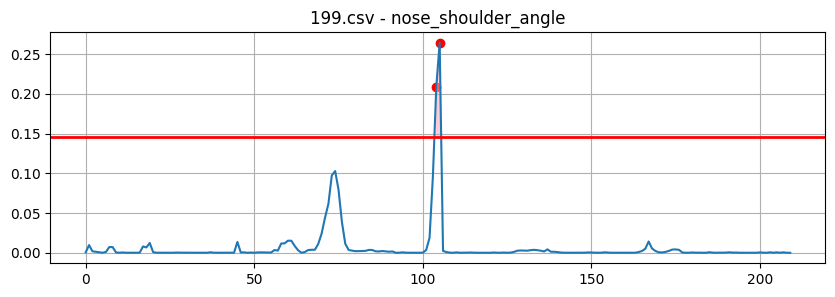

-Patient_number :  206.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 227
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08685960298161637
-Anomaly points: 0


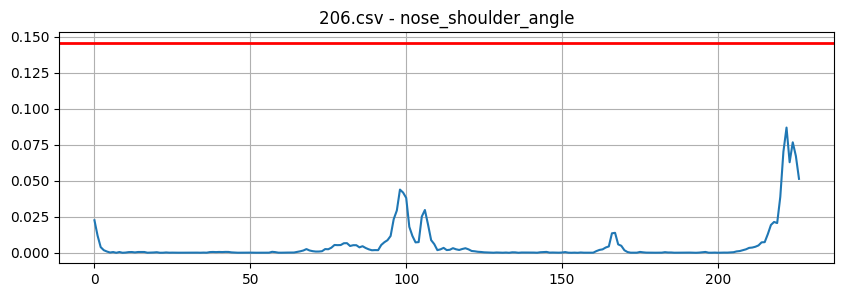

-Patient_number :  208.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 182
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11822534932156917
-Anomaly points: 0


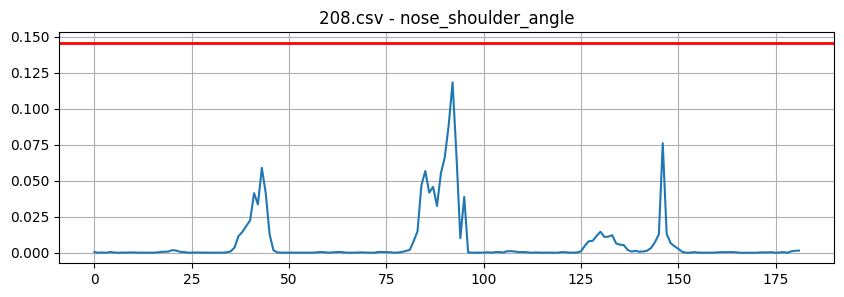

-Patient_number :  209.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 126
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1757673345615135
-Anomaly points: 1


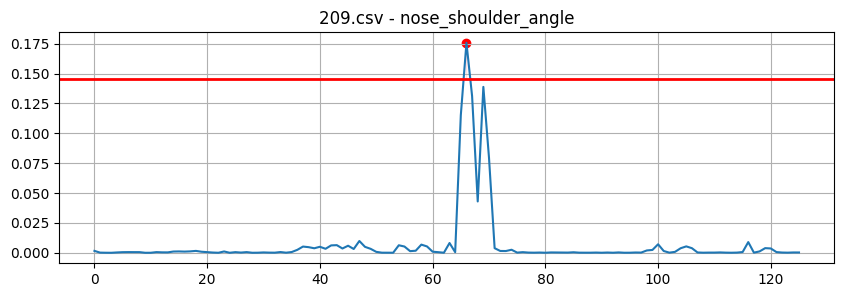

-Patient_number :  216.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 111
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2817615128539418
-Anomaly points: 1


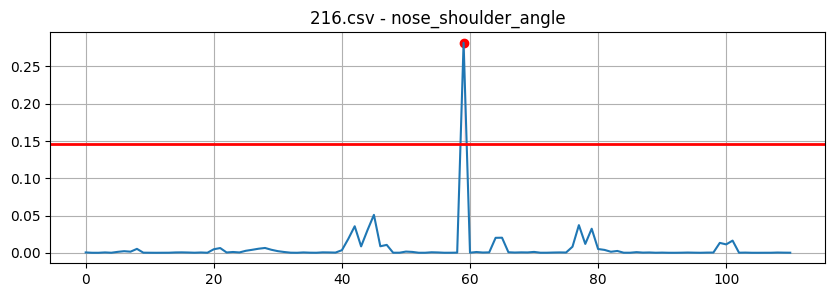

-Patient_number :  23.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 146
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0369496964107372
-Anomaly points: 0


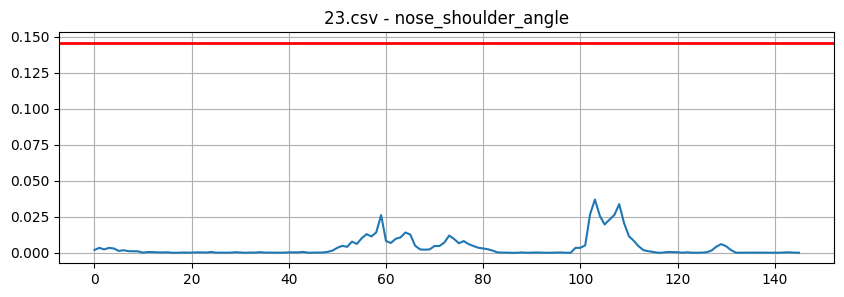

-Patient_number :  230.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 229
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12094452581800093
-Anomaly points: 0


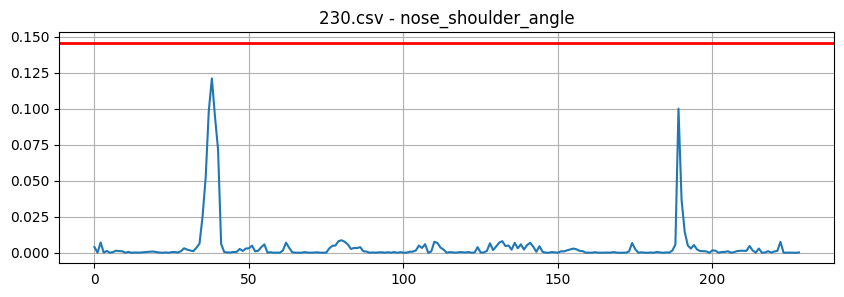

-Patient_number :  244.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 198
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.02136240627615137
-Anomaly points: 0


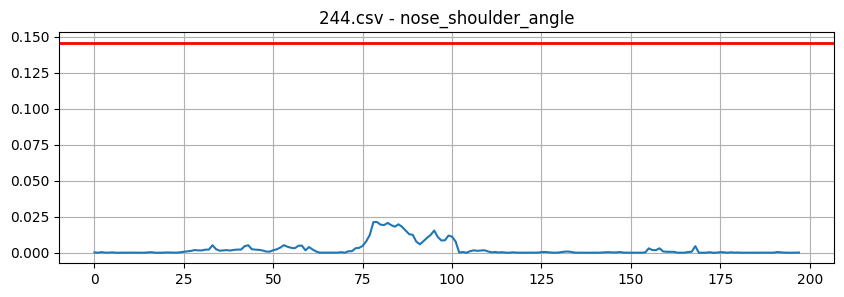

-Patient_number :  264.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 254
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12353209424694402
-Anomaly points: 0


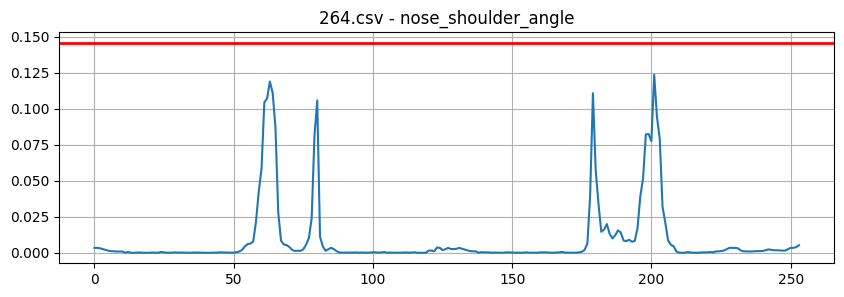

-Patient_number :  275.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 264
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13363296201093097
-Anomaly points: 0


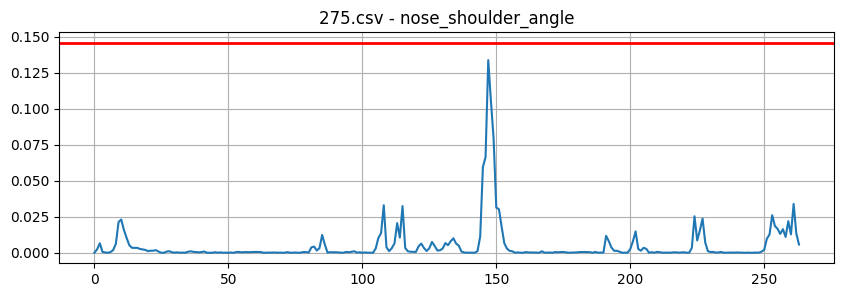

-Patient_number :  278.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 292
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.039760107792996296
-Anomaly points: 0


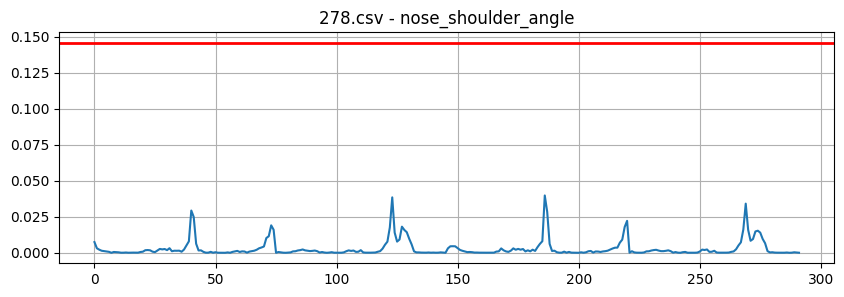

-Patient_number :  28.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 248
-max_anomaly :  0.32029162075933254
-min_anomaly :  0.18113612992797679
-Anomaly Area : 1.0671612351689688
-Reconstruction error threshold : 0.32029162075933254
-Anomaly points: 5


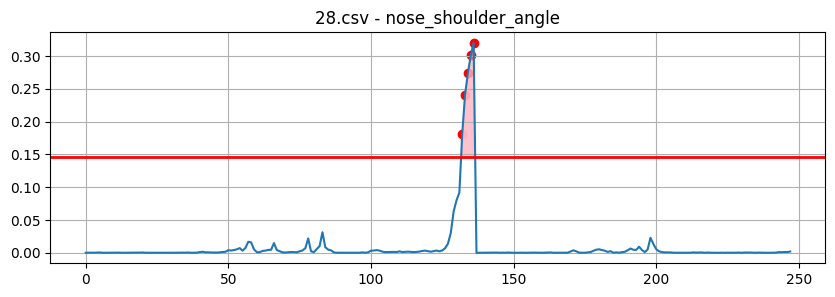

-Patient_number :  284.csv
4/4 [==============================] - 0s 5ms/step
-Data len : 122
-max_anomaly :  0.3668980957653413
-min_anomaly :  0.1546312966832714
-Anomaly Area : 0.9048171636818059
-Reconstruction error threshold : 0.3668980957653413
-Anomaly points: 4


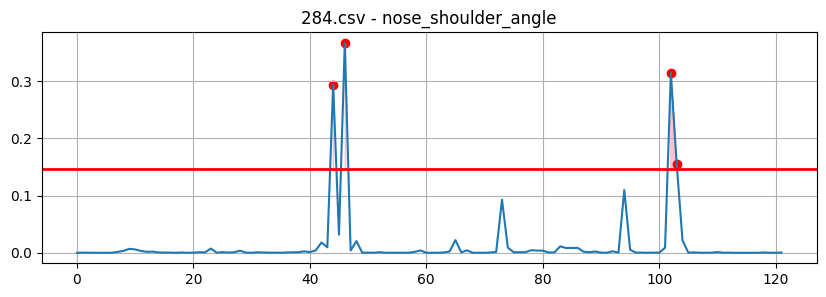

-Patient_number :  285.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 235
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11714279499918076
-Anomaly points: 0


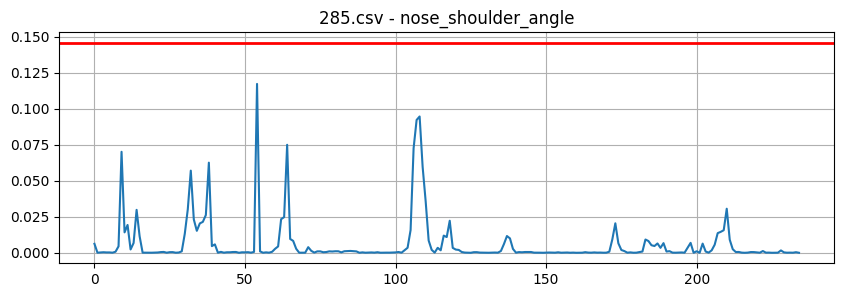

-Patient_number :  286.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 162
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10091694023434436
-Anomaly points: 0


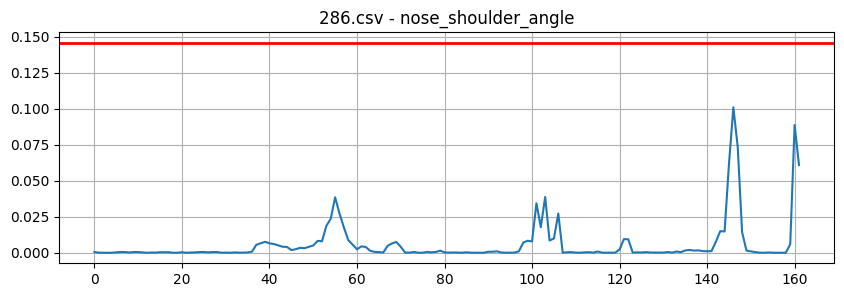

-Patient_number :  287.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 234
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.02549481783558557
-Anomaly points: 0


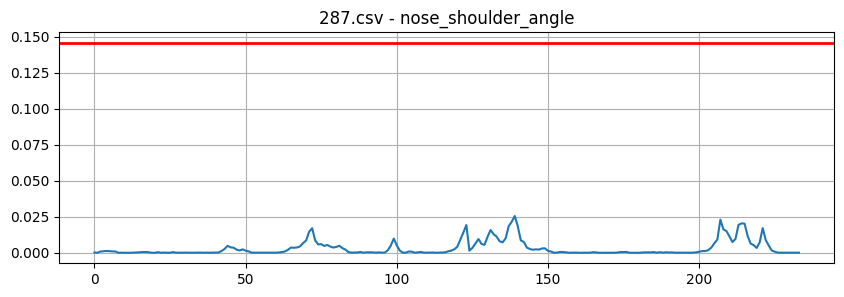

-Patient_number :  298.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 168
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.029259697166613034
-Anomaly points: 0


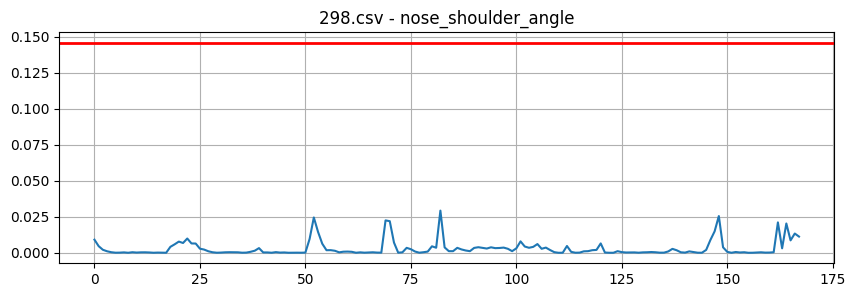

-Patient_number :  333.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 246
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08396211635038263
-Anomaly points: 0


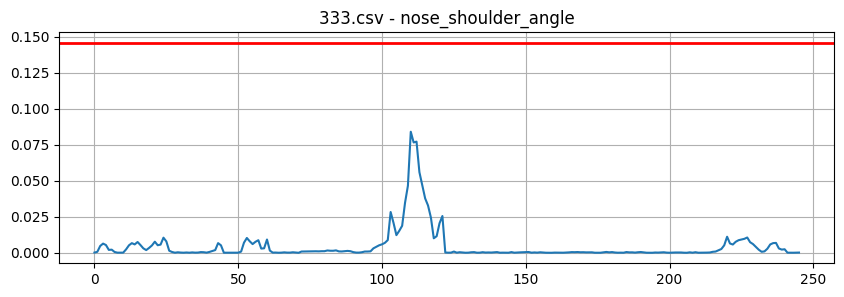

-Patient_number :  337.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 172
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.03170602290654481
-Anomaly points: 0


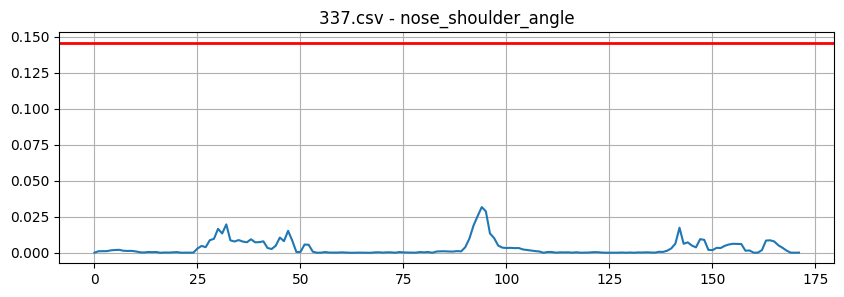

-Patient_number :  338.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 152
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.6924889279923547
-Anomaly points: 1


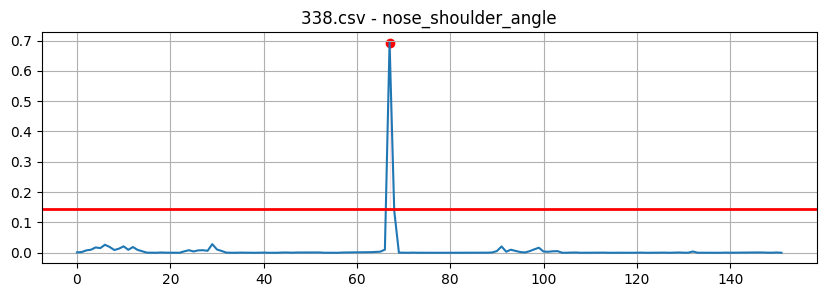

-Patient_number :  340.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 165
-max_anomaly :  0.18852325749476948
-min_anomaly :  0.1536282313832882
-Anomaly Area : 0.17107574443902884
-Reconstruction error threshold : 0.18852325749476948
-Anomaly points: 2


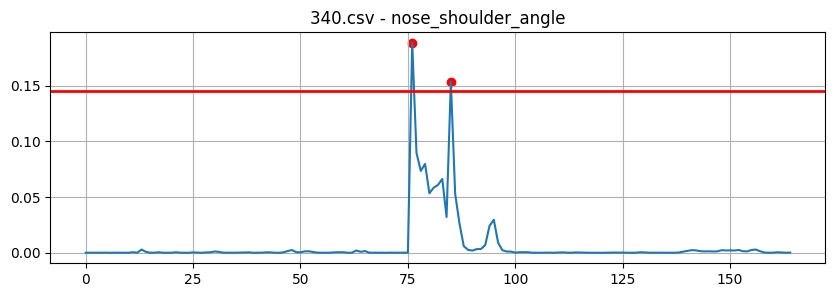

-Patient_number :  341.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 183
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0549163665648331
-Anomaly points: 0


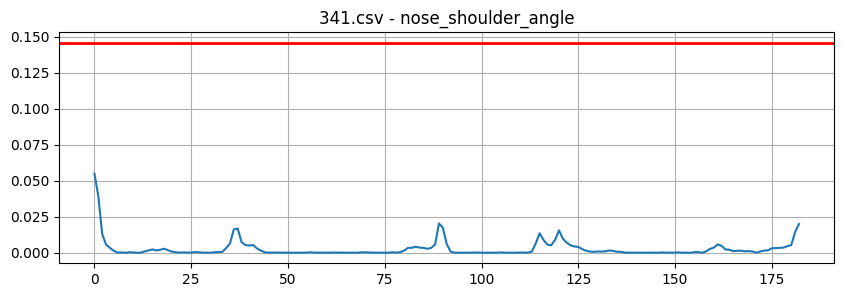

-Patient_number :  344.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1344578332053264
-Anomaly points: 0


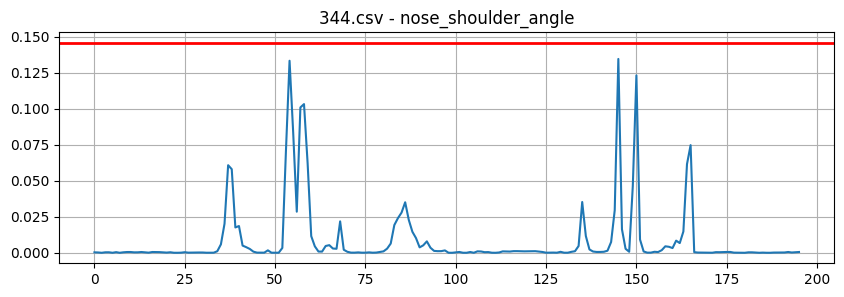

-Patient_number :  354.csv
9/9 [==============================] - 0s 5ms/step
-Data len : 263
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.04133391629259319
-Anomaly points: 0


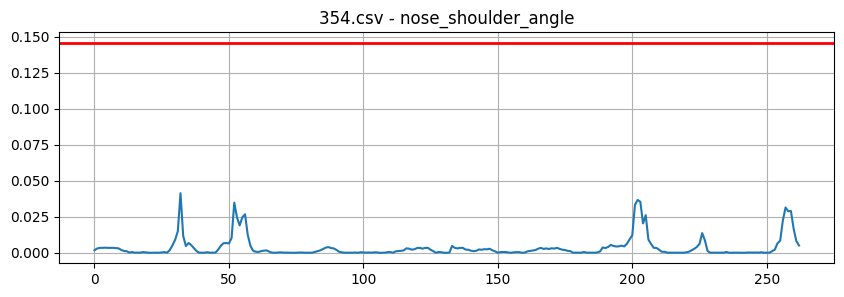

-Patient_number :  356.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 228
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0786052415847071
-Anomaly points: 0


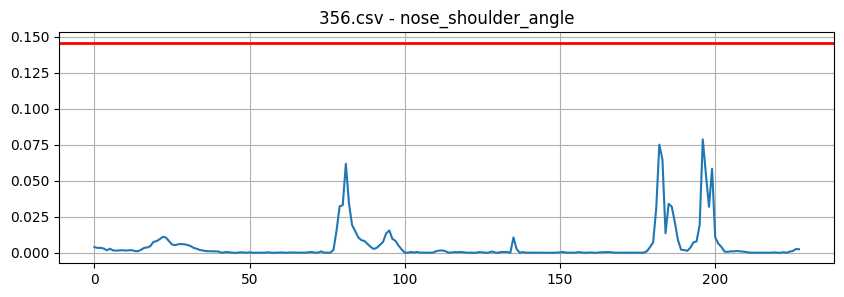

-Patient_number :  358.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 236
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.05608959783049429
-Anomaly points: 0


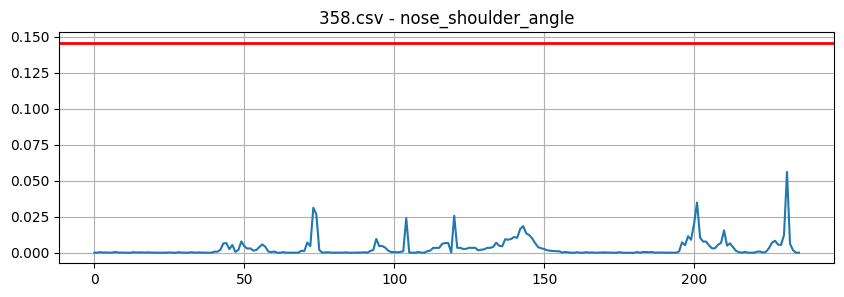

-Patient_number :  36.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 215
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11314535698324807
-Anomaly points: 0


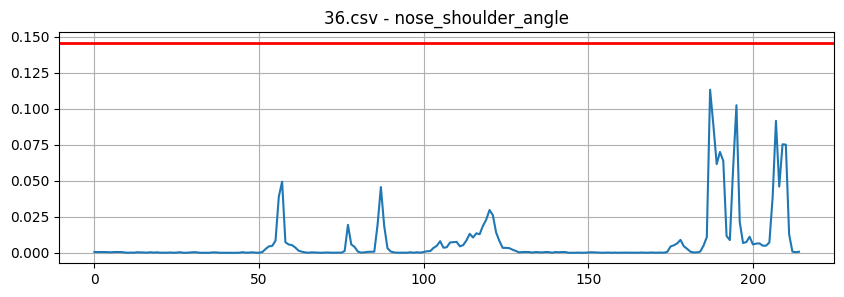

-Patient_number :  360.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12204805035652537
-Anomaly points: 0


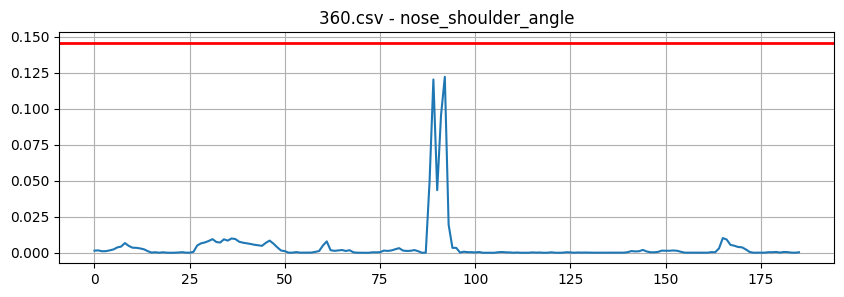

-Patient_number :  364.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 195
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.050521356825952685
-Anomaly points: 0


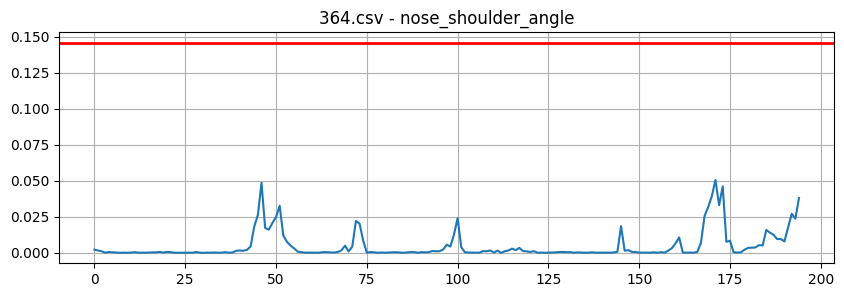

-Patient_number :  365.csv
2/2 [==============================] - 0s 4ms/step
-Data len : 63
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.14715085598543118
-Anomaly points: 1


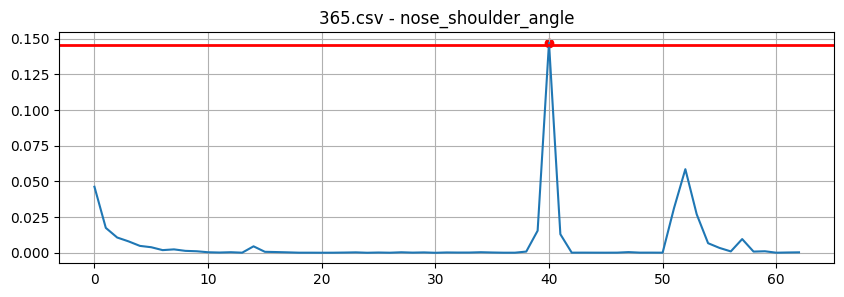

-Patient_number :  367.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 259
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.03460562915694804
-Anomaly points: 0


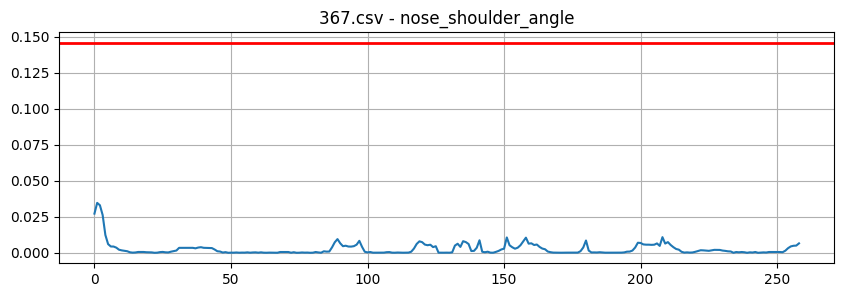

-Patient_number :  369.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 134
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.043221592271111435
-Anomaly points: 0


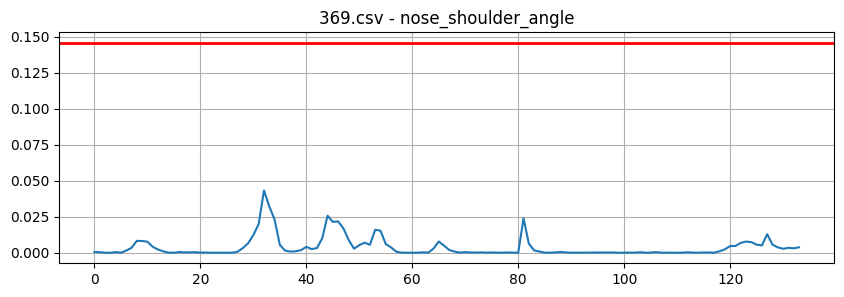

-Patient_number :  391.csv
12/12 [==============================] - 0s 4ms/step
-Data len : 362
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.05250599803702425
-Anomaly points: 0


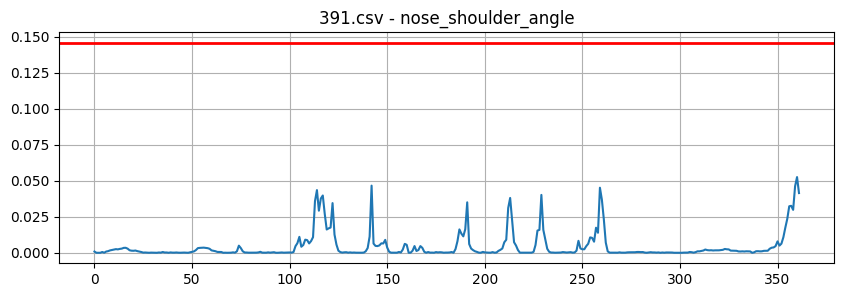

-Patient_number :  398.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 238
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.06509280363667219
-Anomaly points: 0


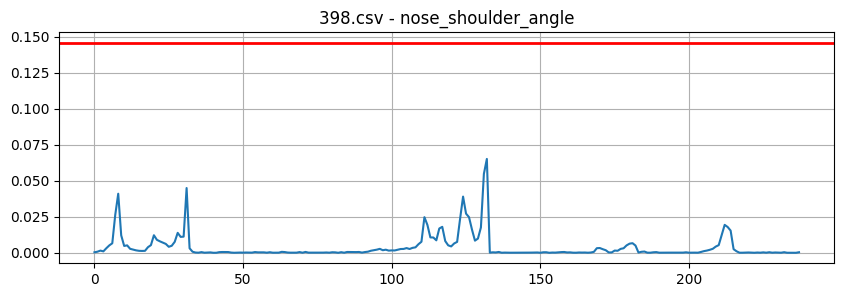

-Patient_number :  400.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 148
-max_anomaly :  0.352858958623116
-min_anomaly :  0.15351762569410088
-Anomaly Area : 0.9762878986329797
-Reconstruction error threshold : 0.352858958623116
-Anomaly points: 5


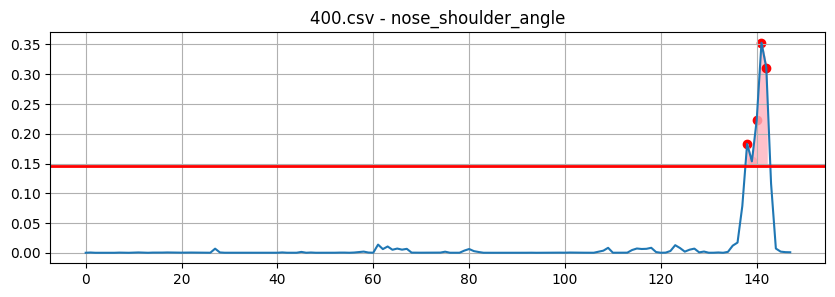

-Patient_number :  412.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 128
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.04810548060489206
-Anomaly points: 0


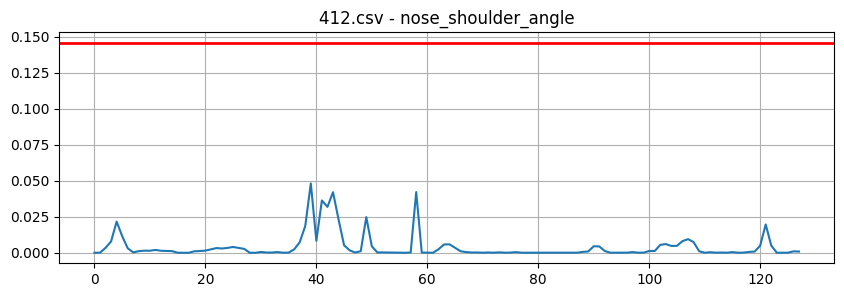

-Patient_number :  414.csv
5/5 [==============================] - 0s 5ms/step
-Data len : 135
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.05409822109757247
-Anomaly points: 0


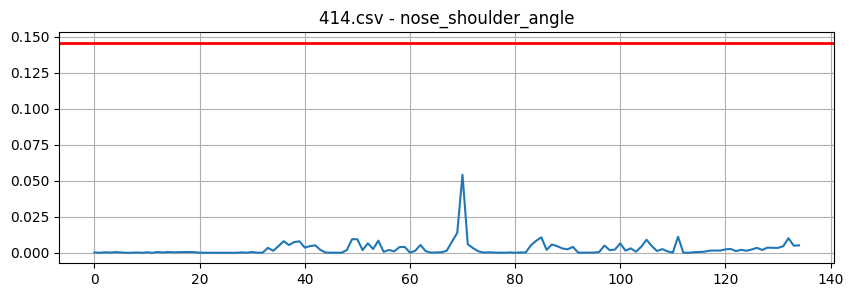

-Patient_number :  420.csv
3/3 [==============================] - 0s 4ms/step
-Data len : 95
-max_anomaly :  0.27092106416404704
-min_anomaly :  0.14654854459164846
-Anomaly Area : 0.20873480437784775
-Reconstruction error threshold : 0.27092106416404704
-Anomaly points: 2


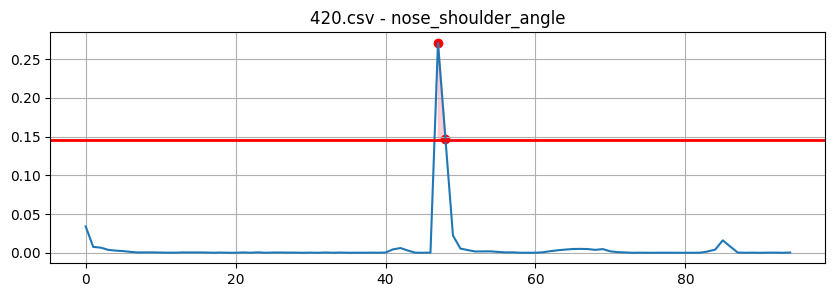

-Patient_number :  423.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 121
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0268806740548269
-Anomaly points: 0


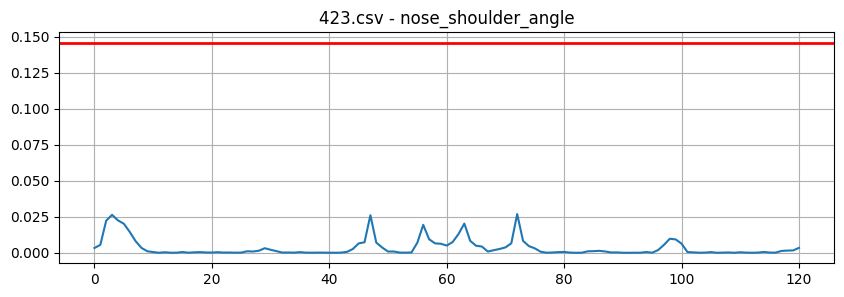

-Patient_number :  428.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13392772296841765
-Anomaly points: 0


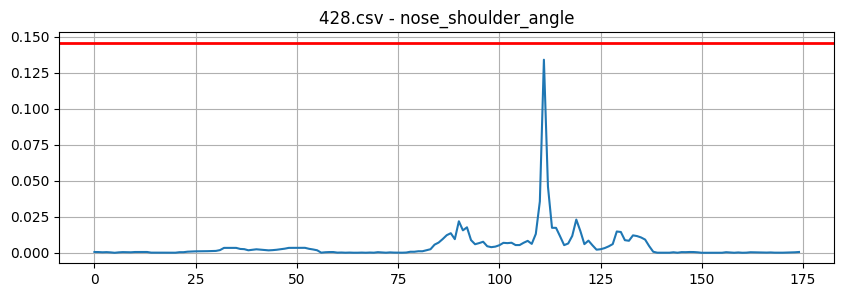

-Patient_number :  43.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.034907061291096275
-Anomaly points: 0


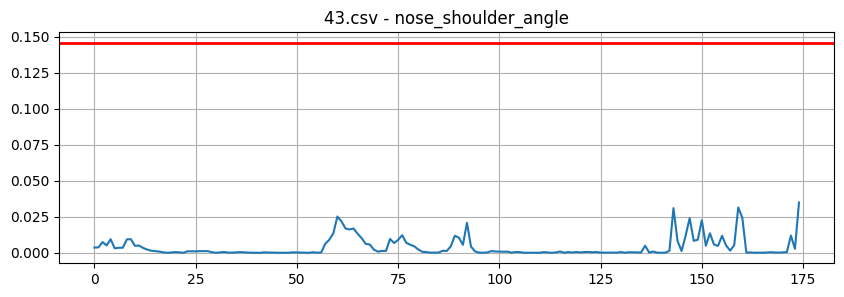

-Patient_number :  432.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 173
-max_anomaly :  0.250047271929099
-min_anomaly :  0.2165284169356154
-Anomaly Area : 0.4638245298134762
-Reconstruction error threshold : 0.250047271929099
-Anomaly points: 3


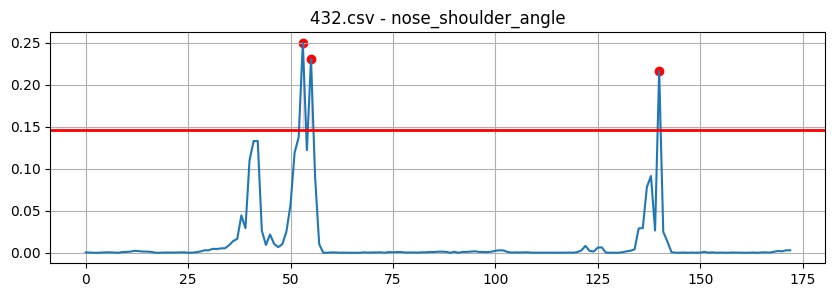

-Patient_number :  436.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 302
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.01873020539830948
-Anomaly points: 0


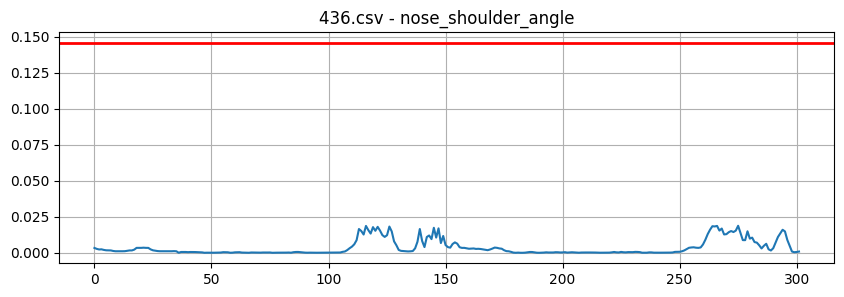

-Patient_number :  445.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.051936801306412095
-Anomaly points: 0


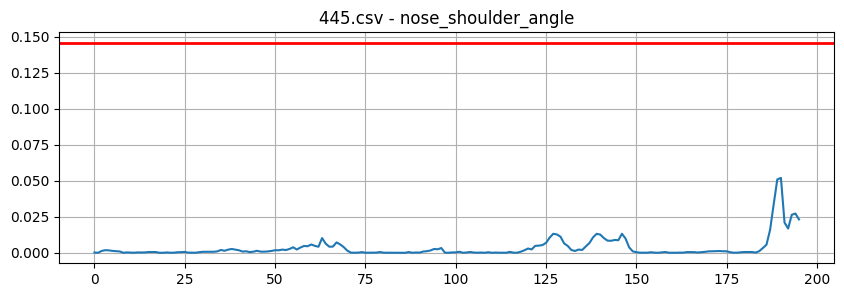

-Patient_number :  56.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 219
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09407586596228887
-Anomaly points: 0


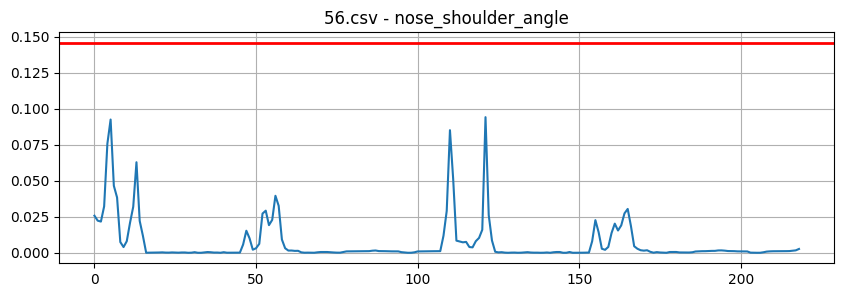

-Patient_number :  61.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 101
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10814498447614002
-Anomaly points: 0


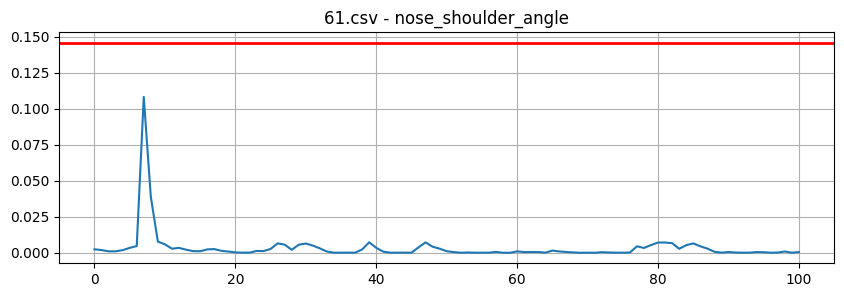

-Patient_number :  84.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 217
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.047452310199390925
-Anomaly points: 0


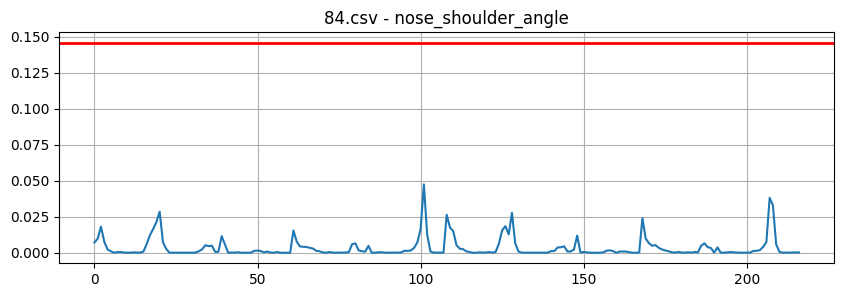

-Patient_number :  85.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 131
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.03245695254668206
-Anomaly points: 0


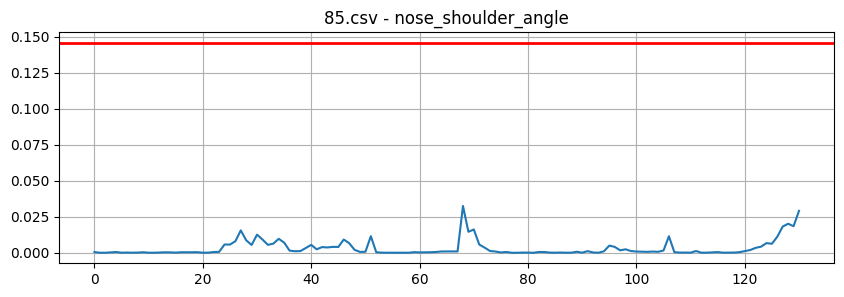

-Patient_number :  91.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 232
-max_anomaly :  0.1648158560887255
-min_anomaly :  0.16036745183110931
-Anomaly Area : 0.16259165395991743
-Reconstruction error threshold : 0.1648158560887255
-Anomaly points: 2


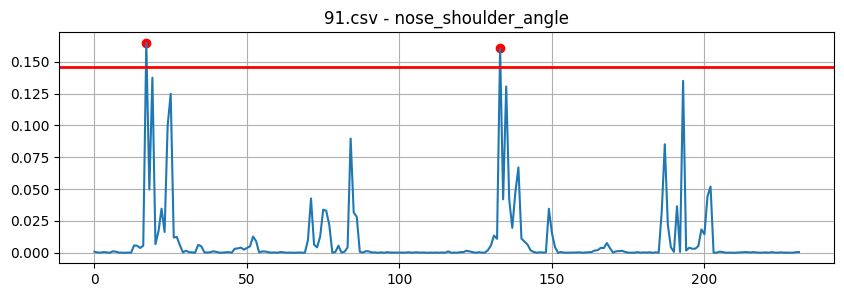

-Patient_number :  97.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 188
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2003040509980033
-Anomaly points: 1


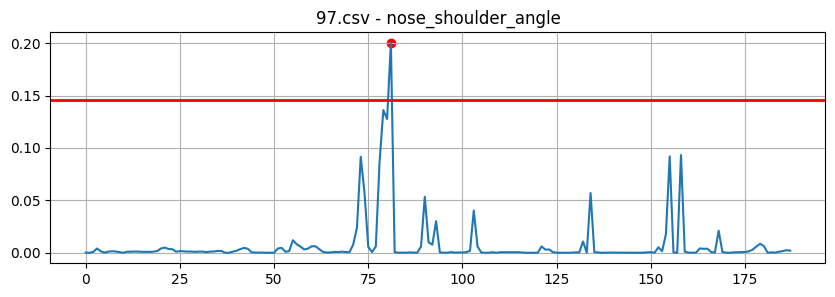

In [20]:
# inte_li = []
# indices = []
data_len = []
total_anomaly = []
total_anomaly_area = []
cont=0

for i in sar_csv:
    print("====================================================================================================")
    path = "test/sar_long_in/"+str(i)
    print("-Patient_number : ",i)
    
    test_sheet = pd.read_csv(path, index_col = 0).dropna()
    test_num = test_sheet[[angle]]
    test_num = scaler.fit_transform(test_num)
    test = np.reshape(test_num,(test_num.shape[0],1,1))
    test_x_predictions = lstm_ae.predict(test)
    test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
    real_a_point = test_sheet['tick']
    real_a_point_list = real_a_point.to_numpy().astype(int)
    
    ra = len(real_a_point_list)
    ta=len(test_mae_loss)
    
    if ra == ta:
        print("-Data len :",ta)
    
    data_len.append(ta)

    plt.figure(figsize = (10,3))
    plt.plot(test_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=2)
    
    red_t = [] # 이상치 갯수 리스트 
    inte_li = []
    indices = []
    data_len = []
    

    red = 0
    
    for j in range(len(real_a_point_list)):
        
        if test_mae_loss[j] >= threshold_ave:
            above_threshold = test_mae_loss >= threshold_ave
            below_threshold = np.logical_not(above_threshold)
            plt.fill_between(np.arange(len(test_mae_loss)), test_mae_loss, threshold_ave, where=above_threshold, color='pink', alpha=0.5) #임계갓 윗 부분
            # plt.fill_betweenx(y=[0,threshold_ave], x1=j, x2=j+1, color='pink') #임계갓 아랫 부분 
            plt.scatter(j, test_mae_loss[j],c='r')
            red = 1
            inte = (test_mae_loss[j])

            inte_li.append(inte) # 이상치 값
            red_t.append(red) # 이상치 갯수 카운트 
            indices.append(j) # 이상치 인덱스 
            total_anomaly.append(inte)
            
    # print("-Anomaly_data : ",inte_li)
    
    if len(red_t) >= 2:
        print("-max_anomaly : ",max(inte_li))
        print("-min_anomaly : ",min(inte_li))

        
    # if len(red_t) <= 10:
    #     print("-중증도 : 1단계")
    # elif len(red_t) >= 10:
    #     print("-중증도 : 2단계")
    # else:
    #     print("-중증도 : 3단계")
    
    if red == 1:
        cont += 1
    
    loss_max = np.max(test_mae_loss)
    anomaly_area = np.trapz(inte_li)
    # total_anomaly_area.append(anomaly_area)
    
    plt.title(i + " - " + angle)
    plt.grid()
    name = i[:-4]
    # plt.savefig(name)
    
    print("-Anomaly Area :", anomaly_area)
    print(f'-Reconstruction error threshold : {loss_max}')
    print("-Anomaly points:",len(red_t))
    
    
    plt.show()


In [21]:
print("이상탐지 환자 수 : ",cont)

이상탐지 환자 수 :  19


=========================================================

# Nomal TEST

In [22]:
test_num = [23, 24, 25]

14/14 [==============================] - 0s 4ms/step
433


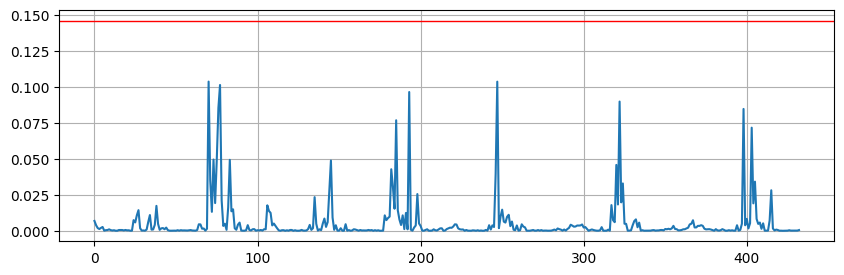

13/13 [==============================] - 0s 4ms/step
397


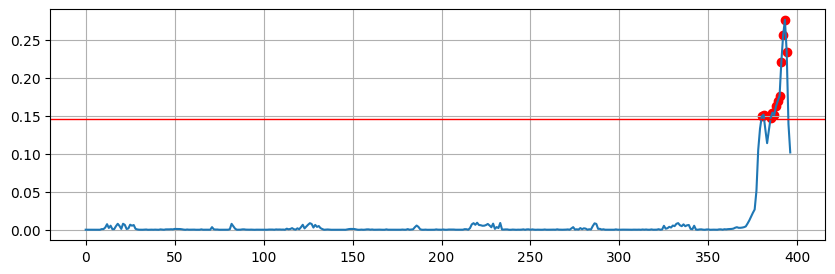

13/13 [==============================] - 0s 4ms/step
405


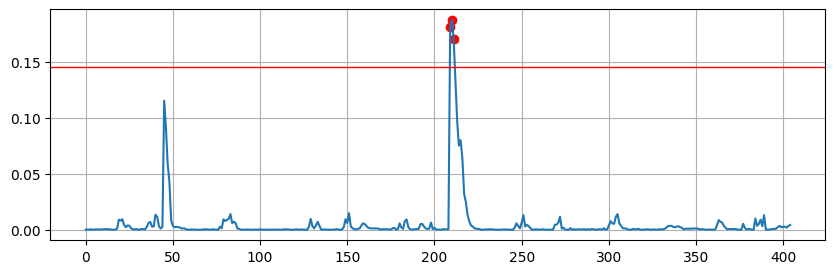

In [23]:
for i in test_num:
    number_num = number[number["num"]== i].dropna()
    number_num = number_num[[angle]]
    # number_num
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    test_no_x_predictions= lstm_ae.predict(number_num)
    test_no_mae_loss = np.mean(np.power(test_no_x_predictions - number_num,2), axis=1).flatten()
    print(len(test_no_mae_loss))
    
    real_a_point_list = len(test_no_mae_loss)
    # real_a_point_list = real_a_point.to_numpy().astype(int)
    
    plt.figure(figsize = (10,3))
    plt.plot(test_no_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=1)
    plt.grid()
    
    for j in range (real_a_point_list) :
        if test_no_mae_loss[j] >= threshold_ave:
            plt.scatter(j, test_no_mae_loss[j],c='r')         
    
    
    
    plt.show()
    
#     test_no_mae_loss_max = np.max(test_no_mae_loss)
#     print(f'Reconstruction error threshold: {test_no_mae_loss_max}')